# Regression

A very simple regression example on the California housing dataset.

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")   # for nicer plots

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.datasets

Let's download the dataset. More details can be found on [scikit-learn.](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [2]:
california=sklearn.datasets.fetch_california_housing()
train_size=15000
X_train,X_test=california.data[:train_size],california.data[train_size:]
y_train,y_test=california.target[:train_size],california.target[train_size:]
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

It's always a good idea to have a look at the data. So let's plot a histogram of the housing values. We should also look at all features and plot their correlations.

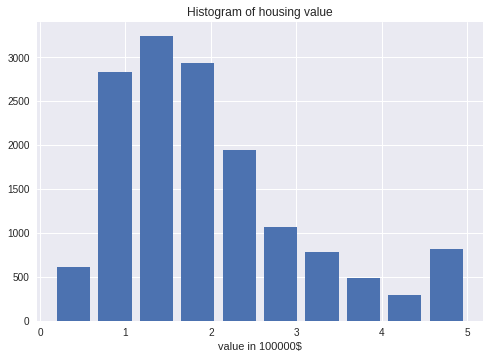

In [3]:
fig,ax=plt.subplots()
ax.hist(y_train,rwidth=0.8)
ax.set_title("Histogram of housing value")
ax.set_xlabel("value in 100000$")
plt.show()

Let's use a decision tree to do regression.

In [4]:
dectree=DecisionTreeRegressor()
dectree

DecisionTreeRegressor()

<code>DecisionTreeRegressor</code> has a number of parameters. A description can be found in the [documentation.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) The most important parameters are probably <code>criterion</code> and <code>max_depth</code>. <code>criterion</code> governs how the vertices of the tree are split. Default value is squared error. <code>max_depth</code> is the maximal depth of the tree. By default the tree can grow to any depth. 

In [5]:
dectree.fit(X_train,y_train)
train_err=mean_squared_error(y_train,dectree.predict(X_train))
test_err=mean_squared_error(y_test,dectree.predict(X_test))
print("Training error as mse: {}".format(train_err))
print("Test error as mse: {}".format(test_err))

Training error as mse: 7.220706819122994e-32
Test error as mse: 0.9042521086466488


We get a zero training error (up to rounding)! Test error, however, is much larger.

Let's compare this to linear regression. What is linear regression? We simply try to fit the training set to a linear function.

In [6]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
train_err=mean_squared_error(y_train,linreg.predict(X_train))
test_err=mean_squared_error(y_test,linreg.predict(X_test))
print("Training error as mse: {}".format(train_err))
print("Test error as mse: {}".format(test_err))

Training error as mse: 0.5084194714822207
Test error as mse: 0.6017472963398959


Linear regression cannot fit the training set perfectly. This is not surprising, we would not expect the housing value to be a linear (noise-free!) function of the features.  The test error is better than for the decision tree.

## Decision trees in regression

To better understand what's happening when we use a decision tree for regression, let's plot the decision tree. Unfortunately, we can only plot parts of the tree -- the full tree is too large. We control how much of the tree we plot by setting the max_depth parameter in plot_tree.

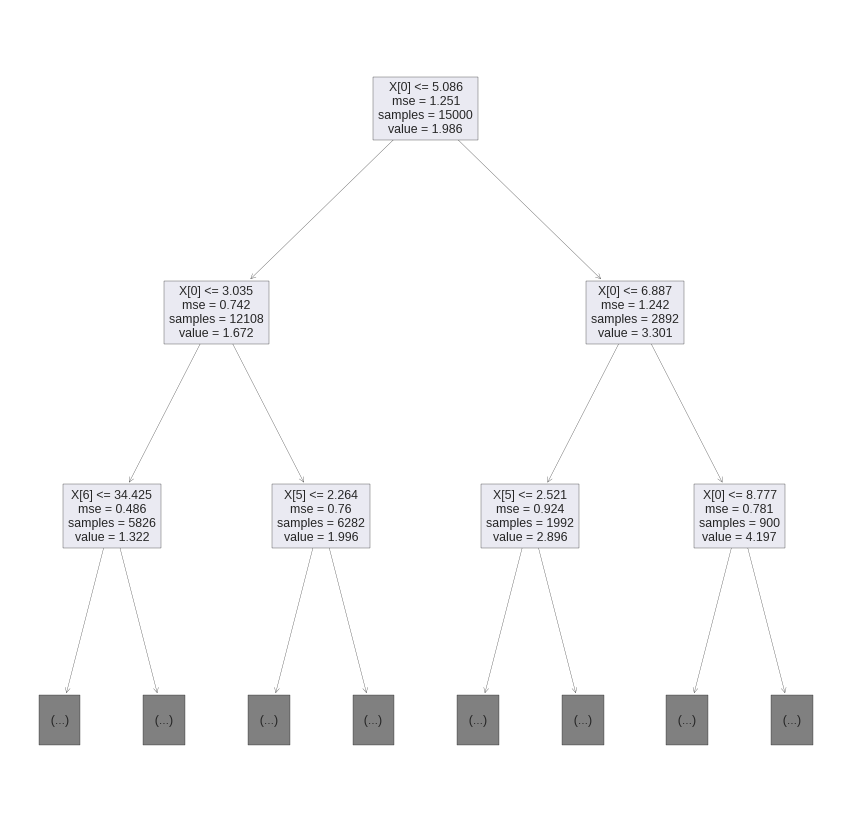

In [7]:
plt.figure(figsize=(15,15))
sklearn.tree.plot_tree(dectree,max_depth=2)
plt.show()

In each node you see how many samples are represented by the node ('samples') and also their mean value ('value'). How does regression work here? For each datapoint we chase the decision rules down the tree until we end up in a leaf and then print out the mean value of all training datapoints in that leaf.